# K Means Clustering

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

<img src='iris.png' width=200 height=200>

In [1]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from sklearn.datasets import load_iris

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['flower'] = iris.target
df['flower']= df['flower'].apply(lambda x: iris.target_names[x])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Petal Length vs. Petal Width**

Text(0, 0.5, 'Petal Width')

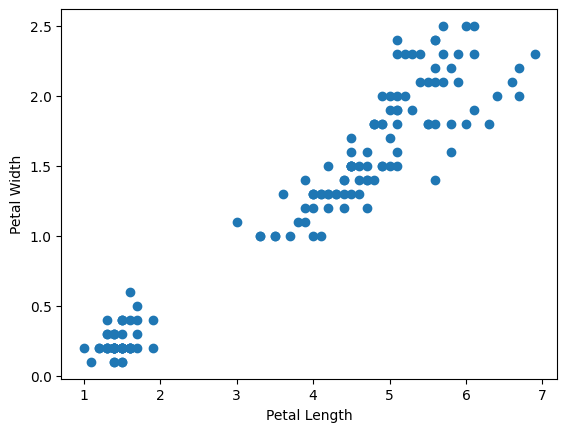

In [6]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

## Using K Means

In [7]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['cluster'] = y_predicted
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [8]:
# Centres of each cluster
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

#### Plot the cluster

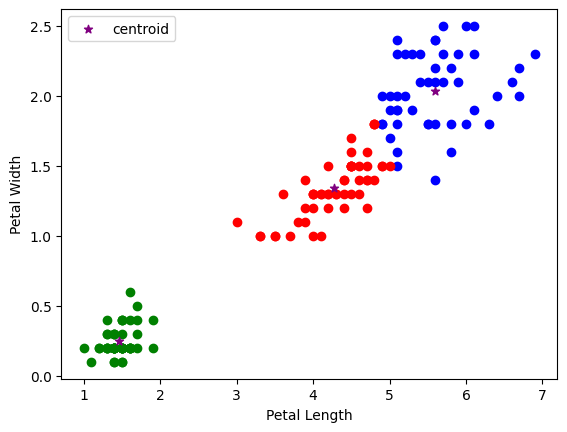

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='red')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

## Preprocessing using min max scaler
Normalize the feature values to a specific range (0 to 1). This helps to minimize scale differences.

In [10]:
scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,cluster
0,5.1,3.5,0.067797,0.041667,setosa,0
1,4.9,3.0,0.067797,0.041667,setosa,0
2,4.7,3.2,0.050847,0.041667,setosa,0
3,4.6,3.1,0.084746,0.041667,setosa,0
4,5.0,3.6,0.067797,0.041667,setosa,0


**Petal Length vs. Petal Width**

Text(0, 0.5, 'Petal Width')

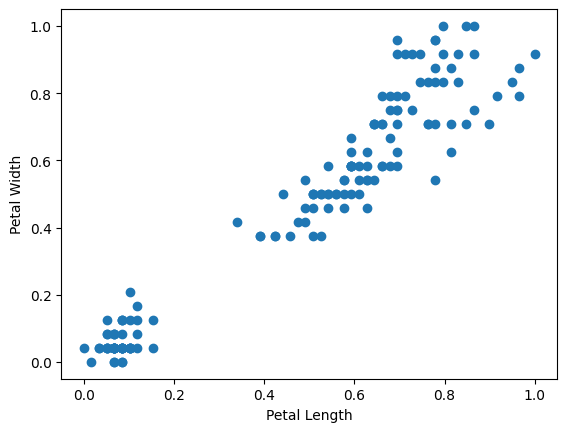

In [11]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

### Using K Means

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['cluster'] = y_predicted
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,cluster
0,5.1,3.5,0.067797,0.041667,setosa,0
1,4.9,3.0,0.067797,0.041667,setosa,0
2,4.7,3.2,0.050847,0.041667,setosa,0
3,4.6,3.1,0.084746,0.041667,setosa,0
4,5.0,3.6,0.067797,0.041667,setosa,0


In [13]:
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

#### Plot the cluster

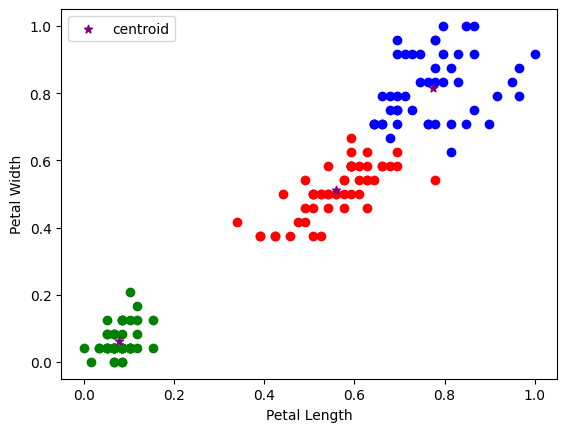

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='red')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

There is not much difference after normalizing.

## Elbow Plot
To find the optimal number of clusters (k)

In [15]:
sse = [] # Sum of squared error
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

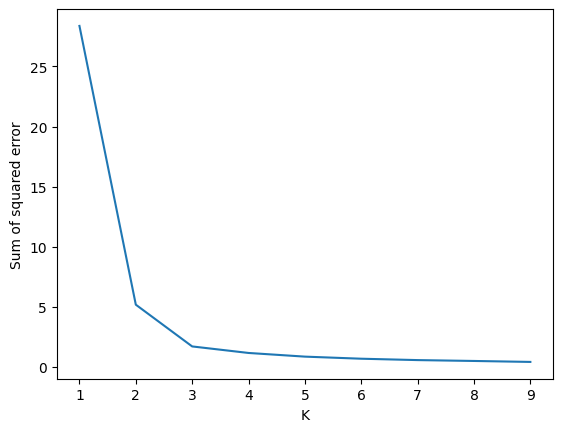

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

Optimal number of cluster is 3